# Calcium Imaging Tutorial 

## Pattern Recognition in Neuroimaging (PRNI) 2020 Virtual Summer School 
----------------------------------------------------------
### Lecturer: Univ. -Professor Manuel Zimmer, IMP & University of Vienna
### Tutor: Akshey Kumar, Research Group Neuroinformatics, University of Vienna
----------------------------------------------------------

### 1. Introduction ###

In this tutorial you will be introduced to neuronal data obtained by calcium imaging techniques on the roundworm, C. elegans. You will learn how unsupervised learning methods can offer us valuable insights into such data. Clustering will be performed to identify patterns in the data. Following this, you will will be introduced to principal component analysis (PCA) and learn to apply it on the data. This reveals something very interesting about how neuronal activity relates with behaviour.

While a major part of this tutorial involves learning about methods and applying them to data, it also invites you to spend some time thinking about the possible ways the results can be interpreted.
 

### 2. Exploring the dataset

The goal of this section is to familiarise yourslef with the calcium imaging dataset. Here, you will load the dataset using `Database()` class.


In [2]:
### In case you do not have certain packages run these lines of code
#import sys
#!{sys.executable} -m pip install mat73

In [3]:
### Required packages and functions
import numpy as np
import matplotlib.pyplot as plt
from load_data import Database
from tutorial_functions import plot_raster, dendogram, plot_phase_space

In [4]:
import mat73
class Database:

    def __init__(self):
        data_set_no = 2
        data_dict = mat73.loadmat('NoStim_Data.mat')
        data  = data_dict['NoStim_Data']

        deltaFOverF_bc = data['deltaFOverF_bc'][data_set_no]
        derivatives = data['derivs'][data_set_no]
        NeuronNames = data['NeuronNames'][data_set_no]
        fps = data['fps'][data_set_no]
        States = data['States'][data_set_no]
        
        
        self.states = np.sum([n*States[s] for n, s in enumerate(States)], axis = 0).astype(int) # making a single states array in which each number corresponds to a behaviour
        self.state_names = [*States.keys()]
        self.neuron_traces = np.array(deltaFOverF_bc).T
        self.derivative_traces = derivatives['traces'].T
        self.neuron_names = np.array(NeuronNames, dtype=object)
        self.fps = fps

        f = open('readme.txt', 'r')
        self.DESCR = f.read()
        f.close()    
        '''
        #Sort the data according to the clustering dendogram (only for dataset 3, as of now)
        self.neuron_traces = self.neuron_traces[sort_indices]
        self.derivative_traces = self.derivative_traces[sort_indices]
        self.NeuronNames = self.NeuronNames[sort_indices]
        '''
        ## Creating dictionary of identified neurons and their indices
        #self.neuron_id = {}
        #for n, i in enumerate(self.NeuronNames):
        #    if type(i) == list:
        #        self.neuron_id[i[0]]=n


#### 2.1 Load the dataset
Use `Database()` to load the dataset. Read the descrption of the attributes found under `Database().DESCR` to gain an understanding of what they represent.

In [5]:
data = Database()
print(data.DESCR)

--------------------------------------
Calcium Imaging Datset from C. elegans
--------------------------------------

The following dataset is part of the published work, Kato et al. 2015, Global Brain Dynamics Embed the Motor Command Sequence of Caenorhabditis elegans, https://doi.org/10.1016/j.cell.2015.09.034.

------------------------------
Attributes of class 'Database' 
------------------------------
fps: volume acquisition rate

neuron_names: It contains an array of names for neurons in the given dataset. Unidentified neurons are represented by a number.

neuron_traces: It contains the original neurons traces (fluorescent change in GCaMP) of the recordings stored as a numpy array with shape (number of neurons) * (number of time frames).

derivative_traces: It contains the time derivatives of the same neurons traces stored as a numpy array with shape (number of neurons) * (number of time frames). The derivatives are calculated derivatives of detrTraces using total-variation regul

#### 2.2 Number of neurons and number of samples
As you have seen the neuron traces, neuron names and derivative traces are stored as a numpy arrays. Use `np.shape` on these arrays and figure out the number of neurons and number of samples.

In [6]:
np.shape(data.neuron_traces)

(131, 3059)

#### 2.3 Neuron names

In [7]:
print(data.neuron_names)

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' 'RMER' 'RMED' '36' 'RMEL' '38' '39' '40' '41' '42' '43'
 'RID' '45' 'RMEV' '47' 'AVAL' 'SMDVL' '50' 'ASKR' '52' 'AVER' '54' '55'
 'SMDVR' 'ALA' 'AIBR' '59' '60' 'AVEL' '62' '63' '64' '65' '66' '67' '68'
 '69' '70' '71' '72' '73' 'AVBR' '75' '76' 'AVHL' 'AVHR' 'AVBL' 'SIADL'
 'AIBL' '82' '83' '84' 'RIVL' '86' 'RIMR' 'RIVR' '89' '90' 'SMDDL' '92'
 '93' '94' 'RIML' '96' 'SMDDR' '98' '99' '100' 'RIBL' '102' '103' '104'
 '105' '106' '107' '108' '109' '110' '111' '112' '113' 'RIS' '115' 'VB02'
 'AVFR' '118' 'VB01' '120' '121' '122' '123' '124' '125' '126' 'AVAR'
 '128' 'RIBR' '130' '131']


Note that only some neurons are identified with their neuron class IDs whereas others that are unidentified are represented by numbers.

Find the index of the 'AVAL' neuron using `np.argwhere`. Use the index to locate the neurons trace and derivative and plot them.

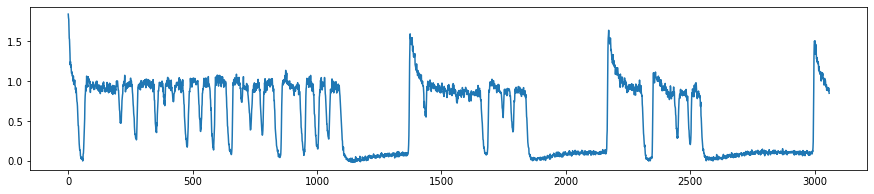

In [8]:
index = np.argwhere(data.neuron_names == 'AVAL')
plt.figure(figsize=(15,3))
AVAL_trace = data.neuron_traces[index].flatten()
AVAL_derivative = data.derivative_traces[index].flatten()
plt.plot(AVAL_trace)

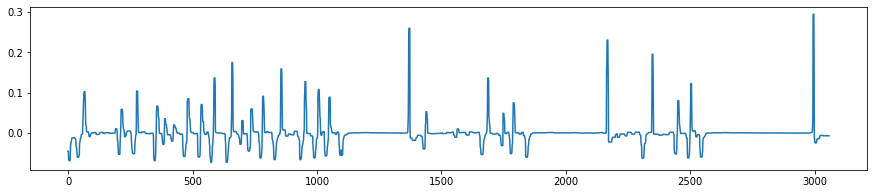

In [9]:
plt.figure(figsize=(15,3))
AVAL_derivative = data.derivative_traces[index].flatten()
plt.plot(AVAL_derivative)

#### 2.4 Visualising the entire dataset
Here, the prewritten function `plot_raster(neuron_traces, derivative_traces)` is used to plot a heatmap of the neuron traces and their derivatives. By simply looking at the plots, can you identify any patterns in the neuronal activity?  

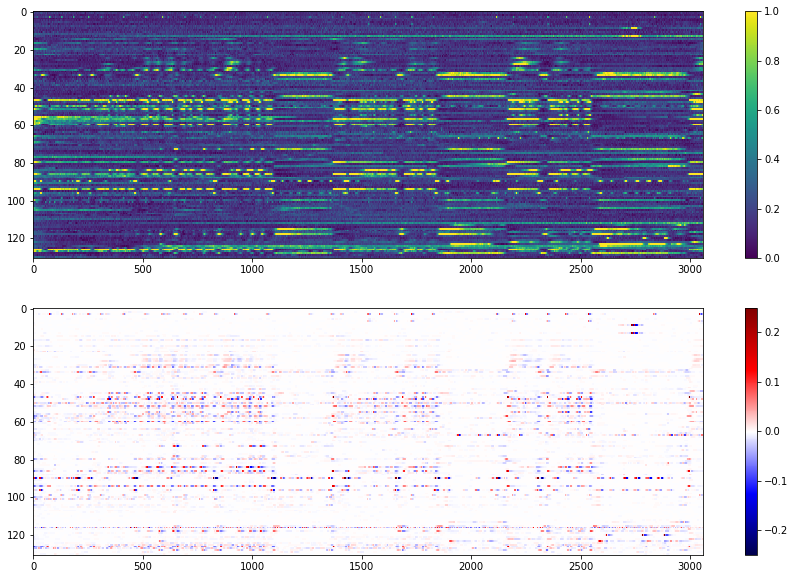

In [10]:
# Plot sorted
plot_raster(data.neuron_traces, data.derivative_traces)

### 3. Sorting the neurons 
As you may have observed, many neruons are highly correlated in their behaviour. Grouping neurons with similar activity can help us to visualise patterns in the data better. In this section you will use a clustering technique to sort the neurons according to their behaviour 

#### 3.1 Calculating the correlation matrix
A correlation matrix is a symmetric matrix that contains the correlation between any two variables in the dataset, in our case neurons. Use the numpy function `corrcoef` to calculate the correlation matrix of the neuron traces. Make sure that it returns what you expect, namely a matrix of shape (number of neurons) $\times$ (number of neurons)

In [11]:
correlation = np.corrcoef(data.neuron_traces)
print(correlation.shape)

(131, 131)


#### 3.2 Clustering the correlation matrix
While it would be possible to cluster the neuron trace data directly, using the number of samples as features, this is computationally more expensive due to the large number of features. Instead we employ agglomerative clustering on the correlation matrix.

1. Import the sklearn library
2. Use `AgglomerativeClustering` from `sklearn.cluster` to cluster the correlation matrix
3. A dendogram is a tree-like representation of agglomerative clustering, in which similar samples are merged together in pairs. Read more here: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html. 
4. Feed the fitted classifier into the `dendogram` function. This function returns the indices of the samples sorted according to the order of the leaves in the dendogram.
6. Use these indices to sort both the neuron traces and derivatives and plot them.

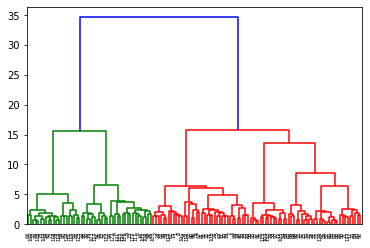

In [12]:
from sklearn.cluster  import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(correlation)
sort_indices = dendogram(clustering)

neuron_traces_sorted = data.neuron_traces[sort_indices]
derivative_traces_sorted = data.derivative_traces[sort_indices]
neuron_names_sorted = data.neuron_names[sort_indices]

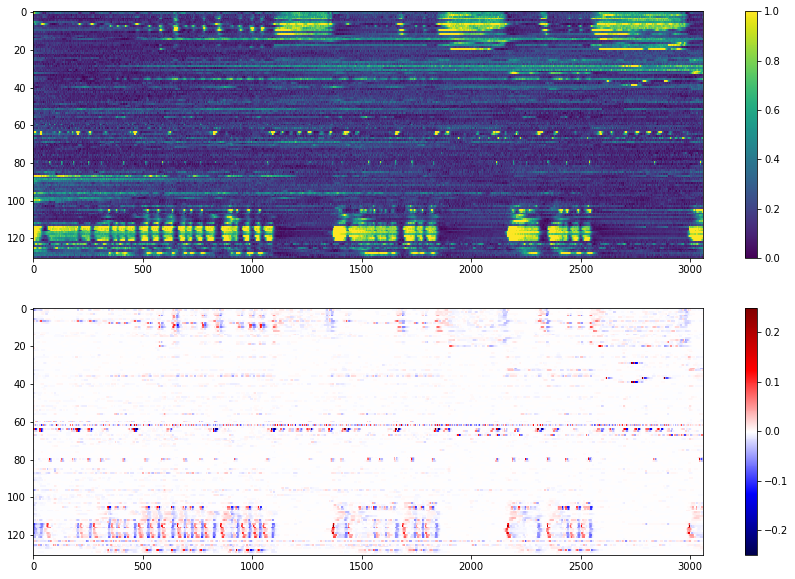

In [13]:
plot_raster(neuron_traces_sorted , derivative_traces_sorted)

## 4. Dimensionality reduction


As seen from the other plots, there are distinct groups of neurons which show similar activity. This suggests that it might be possible to compress our data in some way. i.e. use fewer variables to convey most of the information in the data. In this seciton you will learn about a dimensionality reduction technique called Principal Components Analysis (PCA), apply it to the data, and make interpretations about it.

#### 4.1 Principal component analysis
PCA is a linear transformation that achieves the following:
1. PCA projects the data along the directions of maximum variance.
2. The resulting variables are known as the principal components of the data and are uncorrelated.
3. The principal components are listed in decreasing order of the variance in the data they capture. 
4. Thus, the first few principal components can explain most of the variance in the data. This can be used for dimensionality reduction since the data can be approximately reconstructed from these principal components.

#### 4.2 PCA on the neuron traces
Use the PCA class from `sklearn.decomposition` to transform the neuron traces. Visit the documentation page https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html to learn more about its functionality. Note that the data must be of the form (number of samples) $\times$ (number of neurons) for `PCA().fit`.

Understand what the `explained_variance_ratio_` attribute from the PCA documentation page, and plot it. Also plot the first three principal components. Play around with the principal components and notice how they are orthogonal and uncorrelated to each other (you may use `np.dot`, `np.corrcoef`).

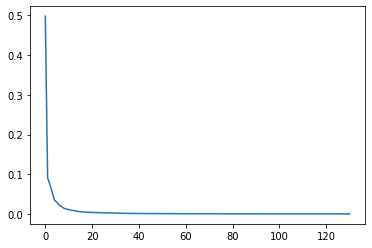

In [14]:
from sklearn.decomposition import PCA

pca = PCA().fit(neuron_traces_sorted.T)
plt.figure()
plt.plot(pca.explained_variance_ratio_)

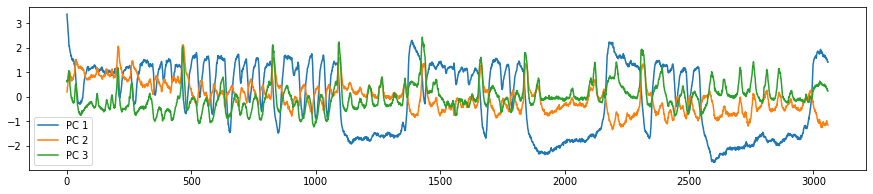

In [15]:
pca_neuron_traces = pca.transform(neuron_traces_sorted.T)
plt.figure(figsize=(15,3))
plt.plot(pca_neuron_traces.T[0], label = 'PC 1')
plt.plot(pca_neuron_traces.T[1], label = 'PC 2')
plt.plot(pca_neuron_traces.T[2], label = 'PC 3')
plt.legend()
plt.show()

##### 4.2.1 Visualising neuronal dynamics in PC space
You may have already noticed some distinct patterns in the principal components. To further your insights, it is useful to view the neuronal dynamics in the PC space. Such a representation of the data, in which each point in the space corresponds to a distinct state is similar to the concept of phase space, if you are familiar with it.

Using the first three PCs, construct a 3-D plot. The data from `data.states` will be used to colour the phase plot according to the behavioural state. To achieve this, use the pre-built function `plot_phase_space(pca_neurons, states)` with the appropriate arguments. Note your observations of the resulting plot. How would you interpret this?

<IPython.core.display.Javascript object>


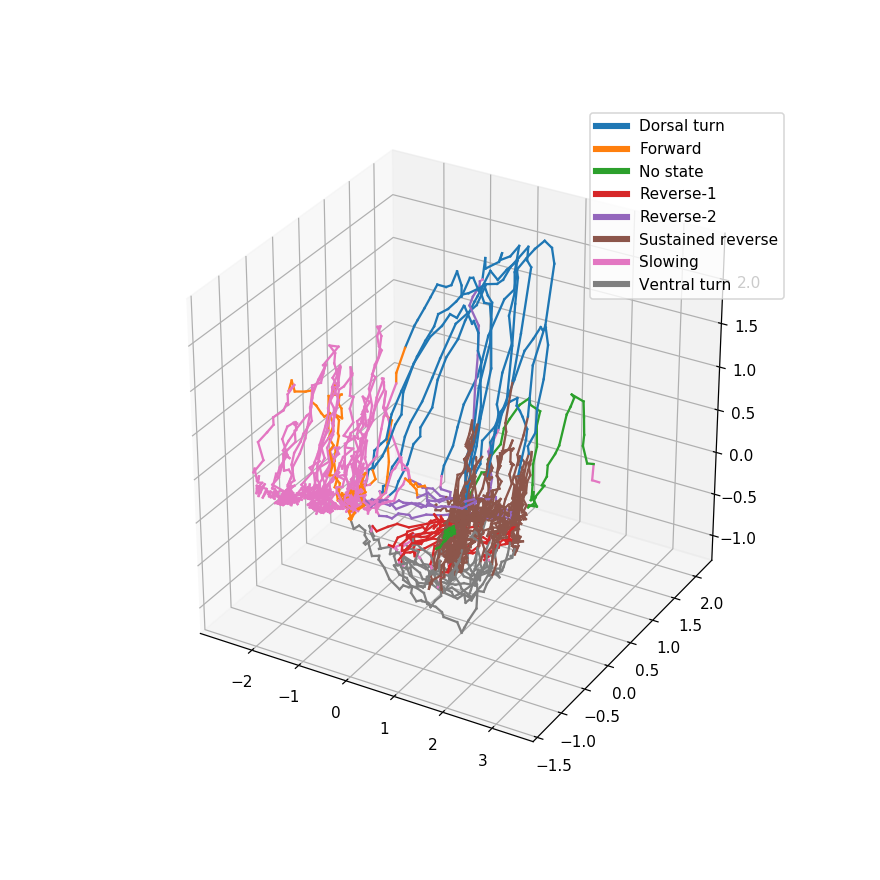

In [16]:
%matplotlib notebook
plot_phase_space(pca_neuron_traces, data.states)

#### 4.2 PCA on the derivative traces
Repeat all of the above steps of the previous subsection on the derivative traces.

<IPython.core.display.Javascript object>


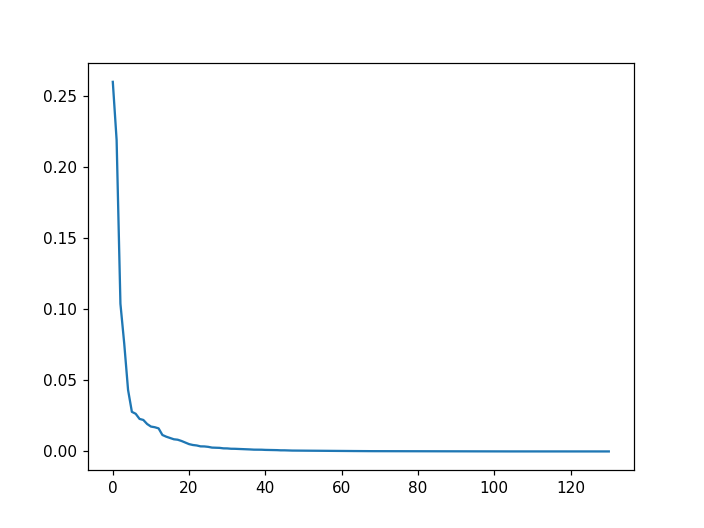

In [17]:
pca = PCA().fit(derivative_traces_sorted.T)
plt.figure()
plt.plot(pca.explained_variance_ratio_)

<IPython.core.display.Javascript object>


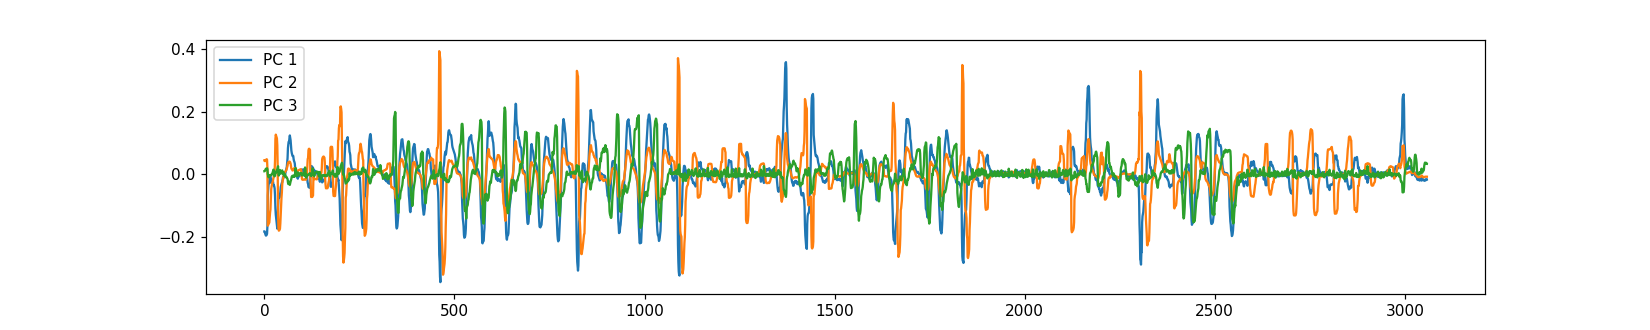

In [18]:
pca_derivative_traces = pca.transform(derivative_traces_sorted.T)
plt.figure(figsize=(15,3))
plt.plot(pca_derivative_traces.T[0], label = 'PC 1')
plt.plot(pca_derivative_traces.T[1], label = 'PC 2')
plt.plot(pca_derivative_traces.T[2], label = 'PC 3')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


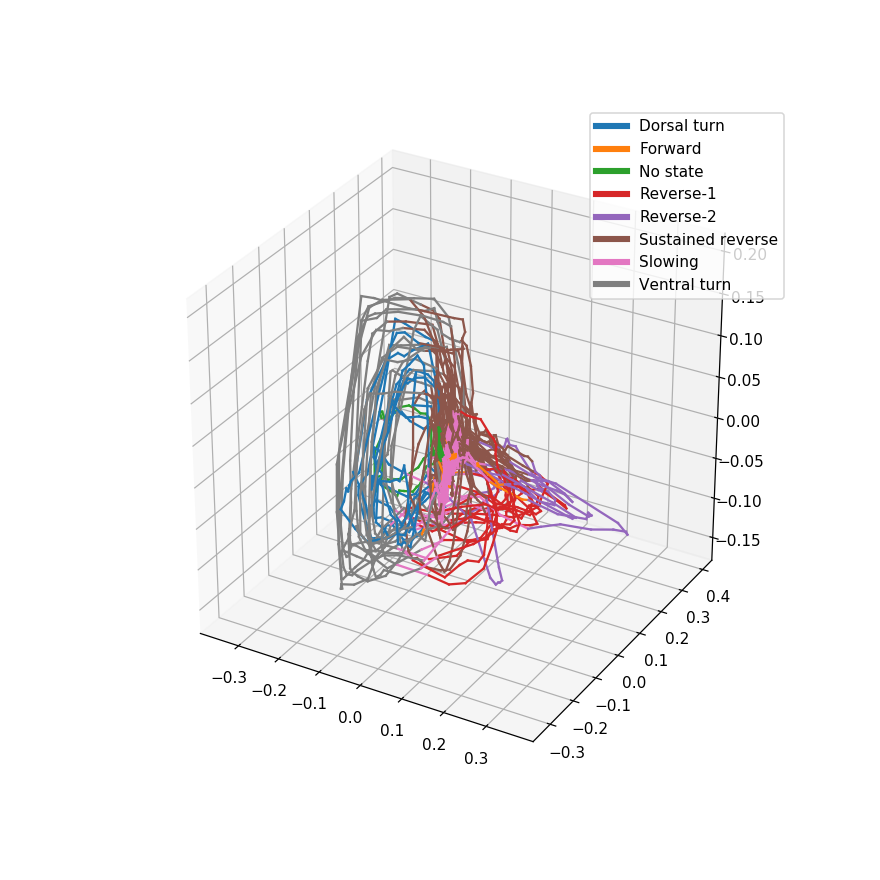

In [19]:
plot_phase_space(pca_derivative_traces, data.states)

#### 4.2 PCA on both the neuron traces and their derivatives
From the above plots we have seen that certain behaviours are more easily distinguished either from the PC's of the neuron traces or their derivatives. This suggests that not only is the instantaneous neuronal activity relevant to describing behavioural dynamics, but also the rate of change of activations in the neurons.

In this section you will perform PCA on the combined dataset of neuron traces and derivatives. Before concatenating the data, you would need to scale the neuron traces and derivative so that they have the same variance (or standard deviation). For this task, suggested functions are `np.std`, `np.concatenate`. Produce a 3-D plot of the first three principal components again, and note your observations. This time for PCA, set the parameter `n_components=3`. This has the seem effect as selecting the first three components as done above.

In [20]:
scaled_traces = neuron_traces_sorted/np.std(neuron_traces_sorted)
scaled_derivatives = derivative_traces_sorted/np.std(derivative_traces_sorted)

In [21]:
# PCA with dericatives and traces
combined_array = np.concatenate((scaled_traces, scaled_derivatives), axis=0)
pca = PCA(n_components=3).fit(combined_array.T)
pca_combined = pca.transform(combined_array.T)

<IPython.core.display.Javascript object>


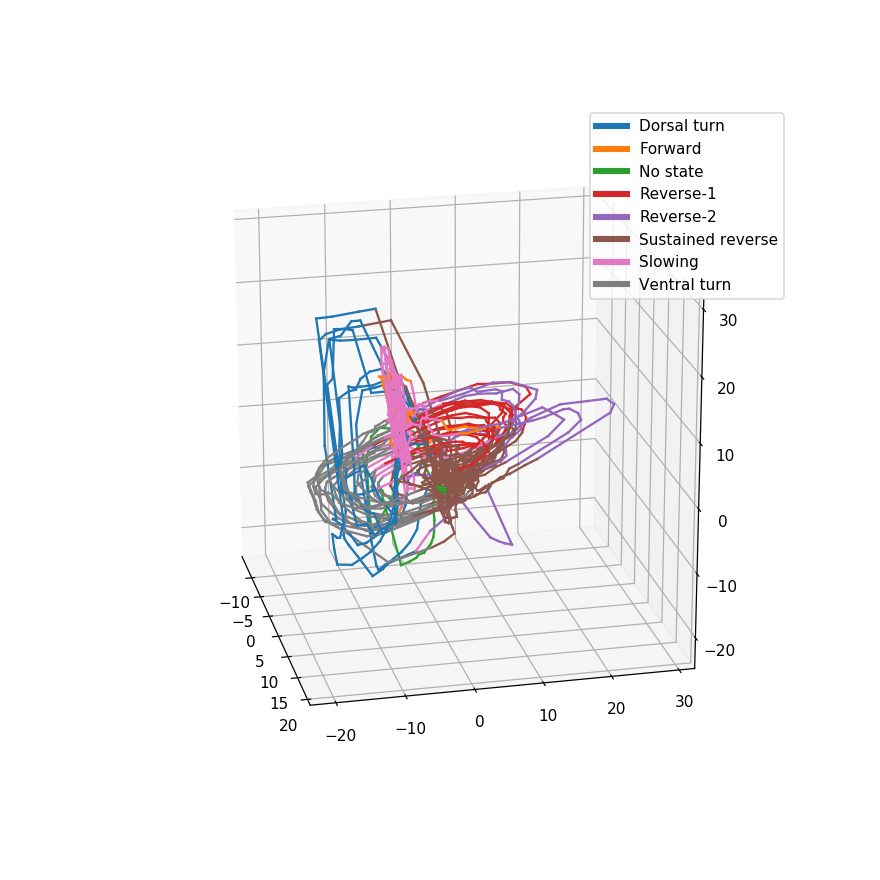

In [22]:
plot_phase_space(pca_combined, data.states)

### Reconstructing the data from the principal components (Bonus task)
One way to check if the PCs indeed captures the global dynamics of the system, is to see how well the original data can be reconstructed just with the first few PCs. Make use of the `inverse_transform` method to reconstruct the data from the PCA transformed data. Choose a neuron index and compare the orginal trace versus the reconstructed trace. Increase the number of principal components above and again compare.

<IPython.core.display.Javascript object>


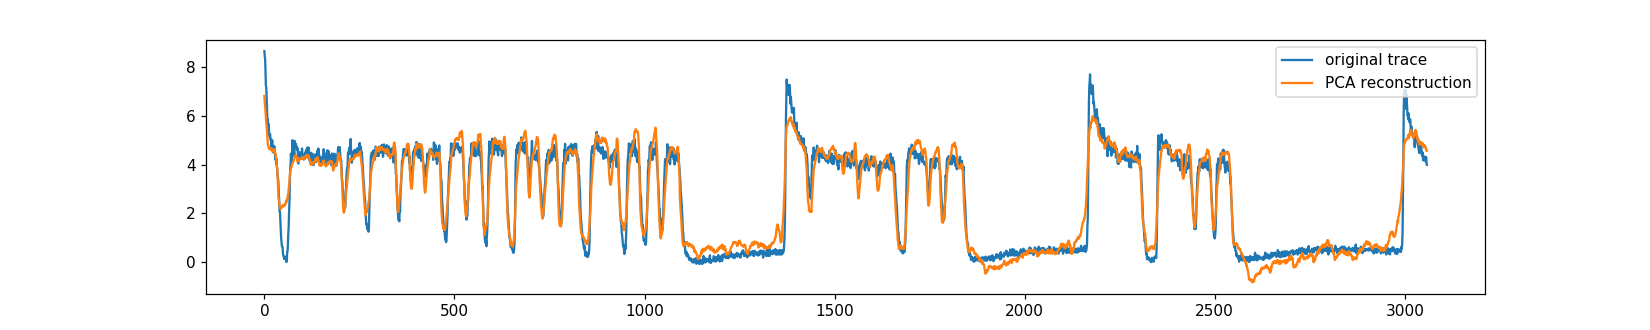

In [23]:
index=115
plt.figure(figsize=(15,3))
plt.plot(combined_array[index], label='original trace')
plt.plot(pca.inverse_transform(pca_combined).T[index], label='PCA reconstruction')
plt.legend()

### Bonus task
Train a random forest classifier (from sklearn) on the neurons to predict the behavioural state of the worm at any given instant.

In [24]:
combined_array.T[1].shape
data.states.shape

(3059,)

In [25]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(combined_array.T, data.states==5, test_size=0.4, shuffle=False)

classifier = RFC().fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)#, precision_score(y_test, y_pred) , recall_score(y_test, y_pred)


0.9689542483660131

In [26]:
neuron_names_sorted[116:119]

array(['RIML', 'AIBR', 'AIBL'], dtype=object)

<IPython.core.display.Javascript object>


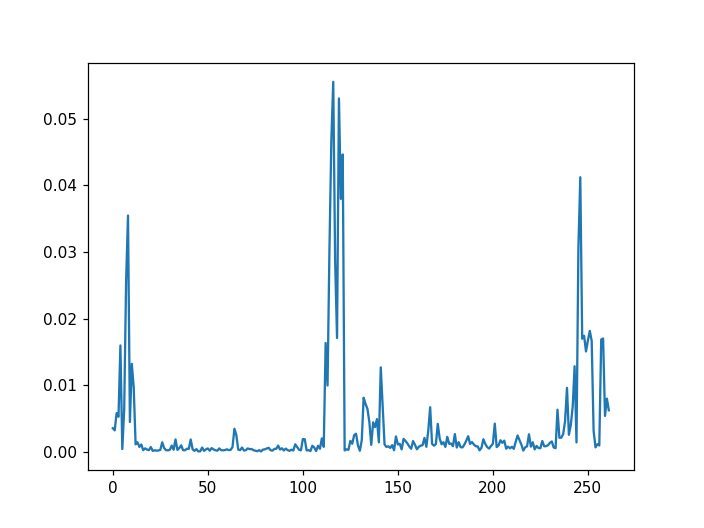

In [27]:
plt.figure()
plt.plot(classifier.feature_importances_)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(pca_combined, data.states, test_size=0.4, shuffle=False)
classifier_2 = RFC().fit(X_train, y_train)
y_pred = classifier_2.predict(X_test)

accuracy_score(y_test, y_pred)#, precision_score(y_test, y_pred) , recall_score(y_test, y_pred)

0.8496732026143791

In [29]:
X_train[1].shape

(3,)

<IPython.core.display.Javascript object>


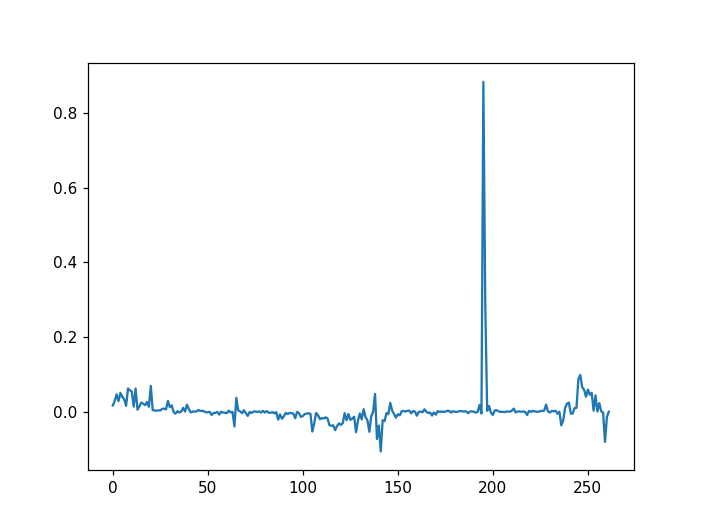

In [30]:
plt.figure()
plt.plot(pca.components_[2])
plt.show()

In [43]:
nn = np.append(neuron_names_sorted, neuron_names_sorted)
nn[pca.components_[2]>0.2]

array(['SMDDL', 'SMDDR'], dtype=object)